# **Additional - Study Case: Simple Stocks Analysis**

Kanto menghampiri Kana dengan memulai pembahasan tentang **NASDAQ** atau kepanjangan dari National Association of Securities Dealers Automated Quotations Stock Market yang berpusat di New York, Amerika Serikat. Setelah sebelumnya Kana belajar pembuatan grafik stock dalam Matplotlib 2, sekarang Kana akan belajar untuk bagaimana membuat simpel analisis dalam Stocks. Adapun data yang dapat digunakan dibawah ini:

```python
!git clone https://github.com/AbelKristanto/datasets.git
df = pd.read_csv("datasets/stocks/stocks_data.csv")
```

**AAPL** merupakan salah satu perusahaan teknologi yang mengalami perkembangan yang cukup signifikan sepanjang tahun 2018 hingga saat ini. Perusahaan ini awalnya berdiri pada bulan Januari 1977 dengan menggunakan nama Apple Computer, Inc. Namun pada bulan Januari tahun 2007, Steve Jobs mengubah nama perusahaan dari Apple Computer, Inc. ke Apple Inc. sebagai cermin beralihnya fokus perusahaan dari pembuat komputer ke barang elektronik konsumen.

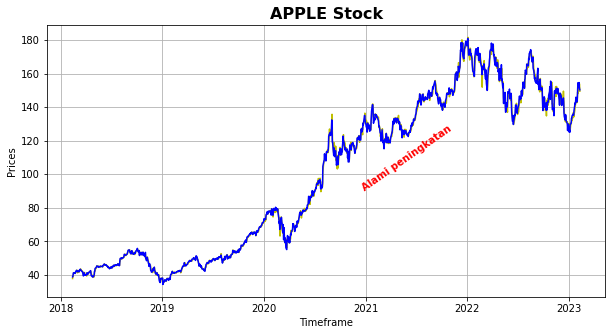

Sekarang, market kapitalisasi AAPL sudah mencapai **2.41 trillion**. Kamu akan menggunakan data dari stocks_data.csv untuk melakukan analisis.

In [1]:
import pandas as pd
!git clone https://github.com/AbelKristanto/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 38 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), 1.36 MiB | 2.85 MiB/s, done.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

## TASK 1 ##
dec6 = pd.read_csv("datasets/stocks/stocks_data.csv", index_col=0).reset_index()
market_cap_raw = dec6[["index", "marketCap"]]

## TASK 2 ##
market_cap_raw.count()

index        3190
marketCap    3172
dtype: int64

**Hapus Stocks yang tidak memiliki Kapitalisasi**

Mengapa count() untuk **index** dan **marketCap** berbeda di atas? Itu karena beberapa stocks yang terdaftar di NASDAQ tidak memiliki kapitalisasi pasar yang diketahui, ini diwakili oleh NaN dalam data, dan NaN tidak dihitung dengan count(). Stocks ini kurang menarik untuk kita analisis lebih dalam ini, jadi aman untuk dihapus.

In [3]:
cap = market_cap_raw.query('marketCap > 0')
## TASK 3 ##
cap.count()

index        3172
marketCap    3172
dtype: int64

**Seberapa besar AAPL dibandingkan dengan stocks lainnya?**

Pada saat ini, AAPL memiliki dominanansi dalam kapitalisasi pasar. Mari plot kapitalisasi pasar untuk 10 stocks teratas sebagai plot bar untuk memvisualisasikan ini dengan lebih baik.

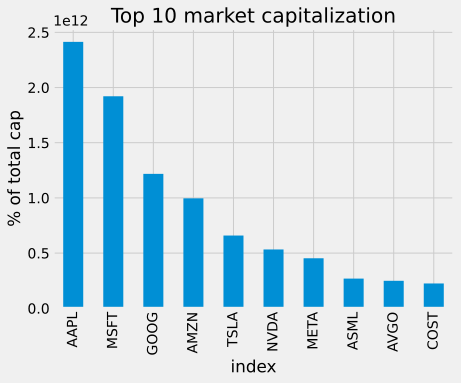

In [4]:
## TASK 4 ##
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
cap10 = cap.sort_values("marketCap", ascending=False).iloc[0:10].set_index("index")
cap10 = cap10.assign(market_cap_perc=round(cap10["marketCap"]/cap.marketCap.sum()*100, 2))
ax = cap10["marketCap"].plot.bar()
ax.set_title(TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)
plt.show()

**Membuat plot lebih mudah dibaca dan lebih informatif**

Meskipun plot di atas cukup informatif, namun dapat kamu diperbaiki. Ada beberapa stocks terlalu besar, dan stocks lainnya sulit dibedakan karena hal ini. Alih-alih persentase, mari gunakan skala log10 dari market kapitalisasi. 

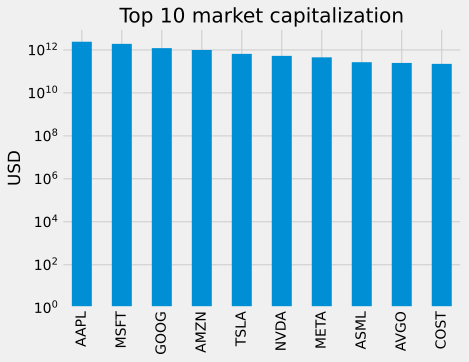

In [5]:
## TASK 5 ##
ax = cap10["marketCap"].plot.bar(log=True)
ax.set_title("Top 10 market capitalization")
ax.set_ylabel("USD")
ax.set_xlabel("")
plt.show()

**Apa yang sedang terjadi?! Volatilitas dalam saham**

Pasar saham sangat fluktuatif apalagi didorong dengan gejolak makro-ekonomi. Mari jelajahi volatilitas ini lebih jauh! Kamu akan mulai dengan memilih dan memplot perubahan persentase 200 hari dengan 50 hari.

In [6]:
## TASK 6 ##
volatility = dec6[["index", "fiftyDayAverageChangePercent", "twoHundredDayAverageChangePercent"]]
volatility = volatility.set_index("index").dropna()
volatility = volatility.sort_values(by=["fiftyDayAverageChangePercent"], ascending=True)
volatility.head()

,fiftyDayAverageChangePercent,twoHundredDayAverageChangePercent
index,,
FREQ,-0.796481,-0.692210
AWIN,-0.789015,-0.807523
TMDI,-0.735514,-0.653343
SINT,-0.691468,-0.914943
TIVC,-0.688930,-0.862981


**Yah, kita sudah bisa melihat bahwa fluktuatif sedikit menarik**

Sepertinya Anda bisa kehilangan banyak uang dengan cepat pada saham jika tidak pintar-pintar dalam mengelola. Mari kita plot 10 pemenang terbesar dan 10 terburuk teratas dalam kapitalisasi pasar.

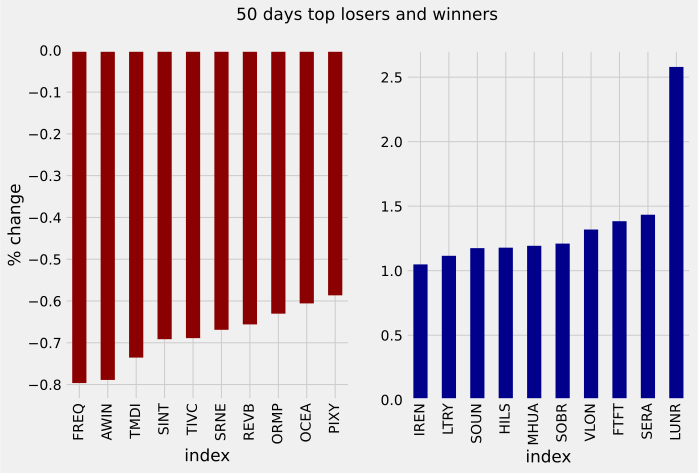

In [7]:
## TASK 7 ##
def top10_subplot(volatility_series, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    ax = volatility_series[:10].plot.bar(ax=axes[0], color="darkred")
    fig.suptitle(title)
    ax.set_ylabel("% change")
    ax = volatility_series[-10:].plot.bar(ax=axes[1], color="darkblue")
    return fig, ax

DTITLE = "50 days top losers and winners"
fig, ax = top10_subplot(volatility.fiftyDayAverageChangePercent,DTITLE)

Oke, menarik. Mari kita periksa dalam waktu 200 hari juga. Silahkan gunakan kembali fungsi yang ditentukan di atas untuk melihat apa yang terjadi 200 hari, bukan 50 hari.

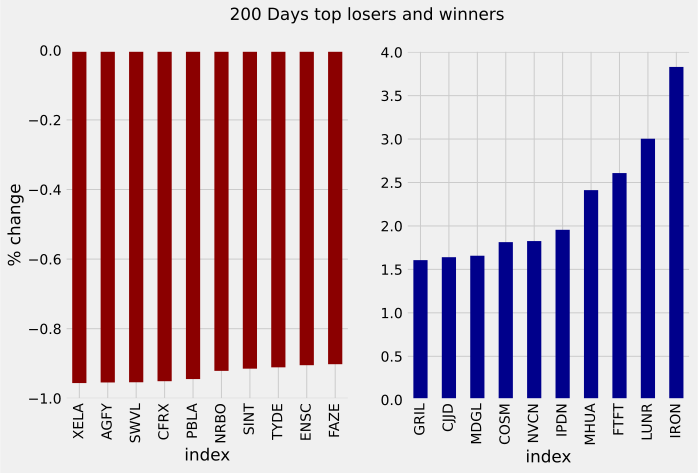

In [9]:
## TASK 8 ##
volatility200d = volatility.sort_values(by="twoHundredDayAverageChangePercent", ascending=True)
WTITLE = "200 Days top losers and winners"
fig, ax = top10_subplot(volatility200d.twoHundredDayAverageChangePercent, WTITLE)

**Seberapa kecilkah itu?**

Nama-nama saham di atas cukup tidak diketahui oleh kita semua, dan ada fluktuasi yang cukup besar antara perubahan persentase 50 dan 200 hari. Semakin kecil kapitalisasinya, semakin besar risiko dan imbalannya. Mari mengklasifikasikan dataset kita berdasarkan kapitalisasi

In [ ]:
## TASK 9 ##
largecaps = cap.query("marketCap>10000000000")
largecaps

,index,marketCap
6,AAPL,2.413631e+12
14,ABNB,8.332610e+10
30,ACGL,2.511316e+10
55,ADBE,1.633659e+11
65,ADSK,4.746443e+10
...,...,...
3067,VRTX,7.537988e+10
3075,VTRS,1.417623e+10
3096,WDAY,4.775060e+10
3139,WYNN,1.235236e+10


**Mari melakukan pengelompokan**

Mari kita beralih dalam melakukan kategori kapitalisasi.

1. Biggish: Market Kapitalisasi besar dari 300,000,000 USD
2. Micro: Market Kapitalisasi dari 50,000,000 sampai dengan 300,000,000 USD
3. Nano: Market Kapitalisasi kurang dari 50,000,000 

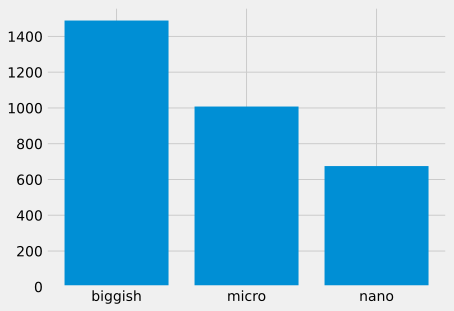

In [10]:
## TASK 10 ##
def capcount(query_string):
    return cap.query(query_string).count()["index"]

LABELS = ["biggish", "micro", "nano"]
biggish = capcount("marketCap>300000000")
micro = capcount("marketCap>50000000 & marketCap<300000000")
nano =  capcount("marketCap<50000000")
values = [biggish, micro, nano]
plt.bar(LABELS, values)
plt.show()